In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# 导入训练集数据
monster = pd.read_csv("..//input/train.csv")

# 输出统计信息
print(monster.describe())
print("------")
print(monster.info())
print("------")
print(monster.head())

               id  bone_length  rotting_flesh  hair_length    has_soul
count  371.000000   371.000000     371.000000   371.000000  371.000000
mean   443.676550     0.434160       0.506848     0.529114    0.471392
std    263.222489     0.132833       0.146358     0.169902    0.176129
min      0.000000     0.061032       0.095687     0.134600    0.009402
25%    205.500000     0.340006       0.414812     0.407428    0.348002
50%    458.000000     0.434891       0.501552     0.538642    0.466372
75%    678.500000     0.517223       0.603977     0.647244    0.600610
max    897.000000     0.817001       0.932466     1.000000    0.935721
------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371 entries, 0 to 370
Data columns (total 7 columns):
id               371 non-null int64
bone_length      371 non-null float64
rotting_flesh    371 non-null float64
hair_length      371 non-null float64
has_soul         371 non-null float64
color            371 non-null object
type             371 non-

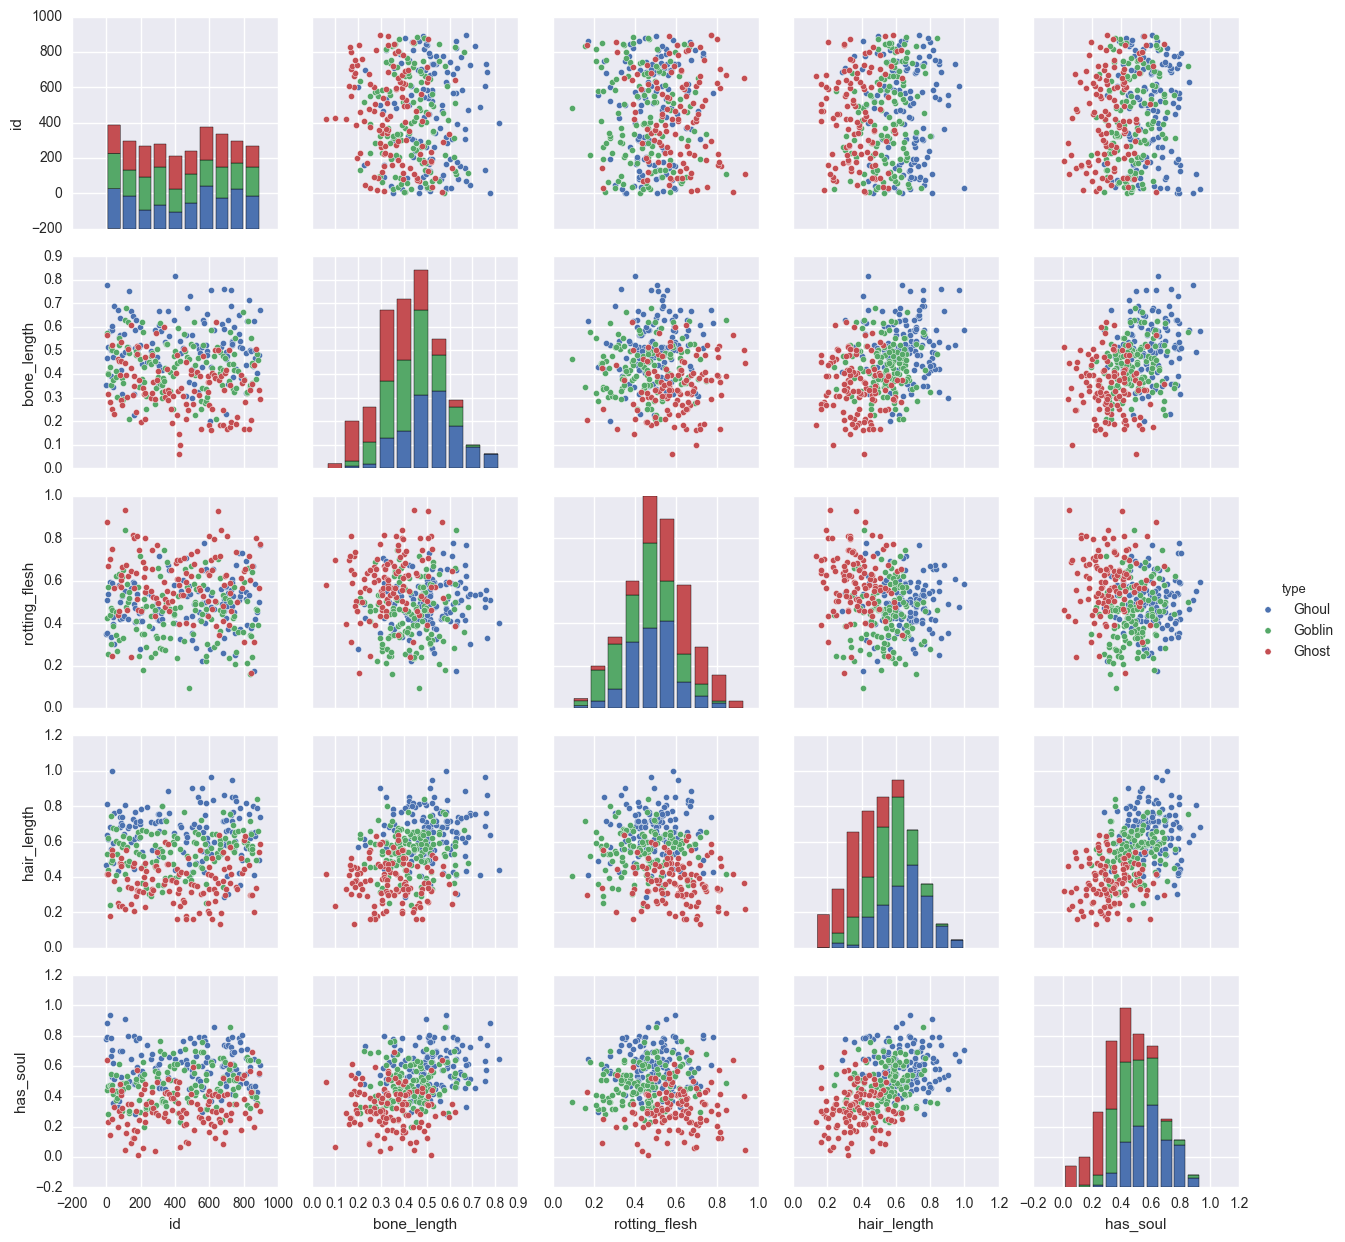

In [4]:
import seaborn as sns
%matplotlib inline
sns.pairplot(monster, hue='type')

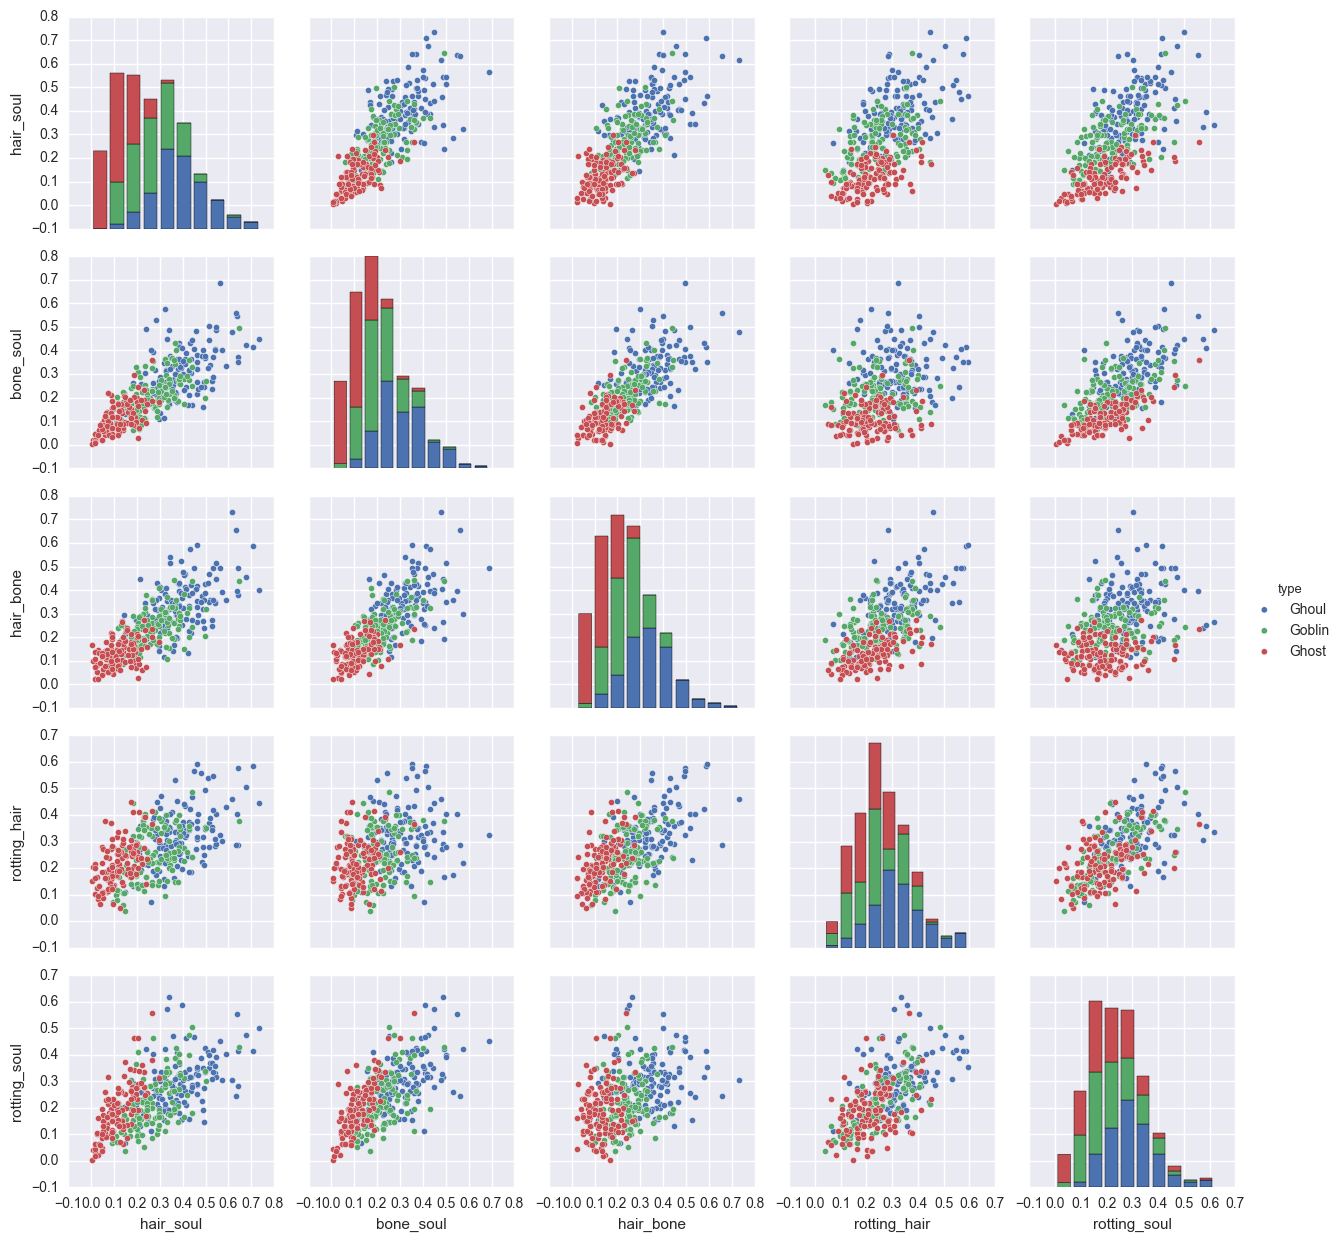

In [11]:
def create_features(dataframe):
    #Create some new variables.
    dataframe['hair_soul'] = dataframe['hair_length'] * dataframe['has_soul']
    dataframe['bone_soul'] = dataframe['bone_length'] * dataframe['has_soul']
    dataframe['hair_bone'] = dataframe['hair_length'] * dataframe['bone_length']
    dataframe['rotting_hair'] = dataframe['rotting_flesh'] * dataframe['hair_length']
    dataframe['rotting_soul'] = dataframe['rotting_flesh'] * dataframe['has_soul']
create_features(monster)
#monster = monster.drop("id", axis=1)
sns.pairplot(monster[["hair_soul","bone_soul", "hair_bone", "rotting_hair", "rotting_soul", 'type']], hue='type')

In [59]:
from sklearn.feature_selection import SelectKBest, chi2

In [71]:
_ = monster['color'].unique()
for idx, t in enumerate(_):
    monster.loc[monster['color'] == t, 'color'] = idx


X = monster[['bone_length', 'rotting_flesh', 'hair_length', 'has_soul', 'color']]
X_chi2 = SelectKBest(chi2, k=3)
X_chi2.fit_transform(X, monster[['type']])

array([[ 0.35451218,  0.46576089,  0.78114167],
       [ 0.57555991,  0.53140138,  0.43989888],
       [ 0.4678755 ,  0.81161609,  0.79122497],
       ..., 
       [ 0.48163973,  0.49644625,  0.54400323],
       [ 0.29494295,  0.58350254,  0.30061804],
       [ 0.67019954,  0.73727435,  0.60838396]])

In [80]:
#导入sklearn库中的LinearSVC和SelectFromModel
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
#基于L1的LinearSVC选择特征， C 越小，选择的特征越少
lsvc = LinearSVC(C=0.02, penalty="l1", dual=False).fit(X, monster[['type']])
model = SelectFromModel(lsvc, prefit=True)
X_lsvc = model.transform(X)
print X_lsvc.shape
print X.shape

(371, 4)
(371, 5)


In [25]:
a=pd.Series([3,3,4,4, 3, 1, 3])

In [30]:
print a.mean(), a.std(), a.var(), a.values.mean(), a.values.std(), a.values.var()

3.0 1.0 1.0 3.0 0.925820099773 0.857142857143


In [48]:
X =np.array([[3], [3], [4], [4], [3], [1], [3]])
scaler = preprocessing.StandardScaler()
scaler.fit(X)

[[3]
 [3]
 [4]
 [4]
 [3]
 [1]
 [3]]


/usr/local/lib/python2.7/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)


StandardScaler(copy=True, with_mean=True, with_std=True)

In [51]:
scaler.var_

array([ 0.85714286])

In [53]:
from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(threshold = 0.8 * (1 - 0.8))

In [54]:
sel

VarianceThreshold(threshold=0.16)

In [15]:
from sklearn import preprocessing
enc = preprocessing.LabelEncoder()
#print monster['color']
enc.fit(monster['color'])
color_ = enc.transform(monster['color'])
print color_.shape
print enc.inverse_transform(color_)


(371,)
['clear' 'green' 'black' 'black' 'green' 'green' 'white' 'clear' 'blue'
 'white' 'clear' 'clear' 'white' 'black' 'clear' 'clear' 'black' 'black'
 'blue' 'green' 'clear' 'white' 'clear' 'white' 'clear' 'white' 'clear'
 'green' 'white' 'clear' 'clear' 'green' 'white' 'green' 'black' 'blue'
 'white' 'clear' 'white' 'black' 'white' 'black' 'white' 'black' 'white'
 'green' 'blood' 'clear' 'clear' 'clear' 'black' 'green' 'clear' 'green'
 'white' 'blue' 'clear' 'clear' 'black' 'white' 'clear' 'green' 'white'
 'black' 'white' 'black' 'white' 'clear' 'black' 'black' 'white' 'white'
 'white' 'green' 'white' 'clear' 'clear' 'white' 'clear' 'clear' 'white'
 'white' 'green' 'black' 'blue' 'clear' 'white' 'black' 'clear' 'white'
 'clear' 'clear' 'clear' 'white' 'black' 'clear' 'black' 'green' 'white'
 'blue' 'black' 'clear' 'green' 'white' 'white' 'clear' 'white' 'blue'
 'white' 'clear' 'white' 'black' 'clear' 'green' 'white' 'white' 'white'
 'blood' 'clear' 'clear' 'white' 'white' 'white' 'g